In [27]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [28]:
orders_df=pd.read_csv(r'C:\Users\sneha\Desktop\delivery\food_order_ver 2.csv',index_col=['Order_ID'])

In [29]:
orders_df.head()

,Customer_ID,Restaurant_ID,Order_Date,Order_Time,Delivery_Time,TimeforDelivery,Order_Value,Delivery_Fee,Payment_Method,Discounts_and_Offers,Commission_Fee,Payment_Processing_Fee,Refunds,Discount_Type,Discount_Amount,Commission_Percentage,Cost,Revenue,Profit,Profit_Margin
Order_ID,,,,,,,,,,,,,,,,,,,,
1,C8270,R2924,01-02-2024,01:11:00,02:39:00,88,1914,0,Credit Card,0.05,150,47,0,ON APP,96,0.078370,143,150,7,0.046667
2,C1860,R2054,02-02-2024,22:11:00,22:46:00,35,986,40,Digital Wallet,0.10,198,23,0,BASIC,99,0.200811,162,198,36,0.181818
3,C6390,R2870,31-01-2024,05:54:00,06:52:00,58,937,30,Cash on Delivery,0.15,195,45,0,NEW USER,141,0.208111,216,195,-21,-0.107692
4,C6191,R2642,16-01-2024,22:52:00,23:38:00,46,1463,50,Cash on Delivery,0.00,146,27,0,NONE,0,0.099795,77,146,69,0.472603
5,C6734,R2799,29-01-2024,01:19:00,02:48:00,89,1992,30,Cash on Delivery,50.00,130,50,0,PROMO,50,0.065261,130,130,0,0.000000


In [30]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             1000 non-null   object 
 1   Restaurant_ID           1000 non-null   object 
 2   Order_Date              1000 non-null   object 
 3   Order_Time              1000 non-null   object 
 4   Delivery_Time           1000 non-null   object 
 5   TimeforDelivery         1000 non-null   int64  
 6   Order_Value             1000 non-null   int64  
 7   Delivery_Fee            1000 non-null   int64  
 8   Payment_Method          1000 non-null   object 
 9   Discounts_and_Offers    1000 non-null   float64
 10  Commission_Fee          1000 non-null   int64  
 11  Payment_Processing_Fee  1000 non-null   int64  
 12  Refunds                 1000 non-null   int64  
 13  Discount_Type           1000 non-null   object 
 14  Discount_Amount         1000 non-null   int64

Text(0.5, 1.0, 'Top 10 most profit making resturent')

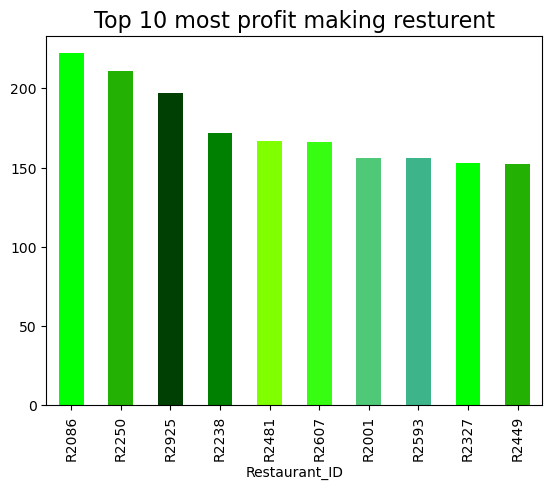

In [72]:
ax3 = orders_df.groupby('Restaurant_ID')['Profit'].sum().nlargest(10).plot(kind='bar',color=('#00FF00','#23B103','#004002','#008000','#7FFF00','#37FD12','#4FC978','#3DB489'))
plt.title('Top 10 most profit making resturent',fontsize = 16)

Text(0.5, 1.0, 'Top 10 most profit making resturent')

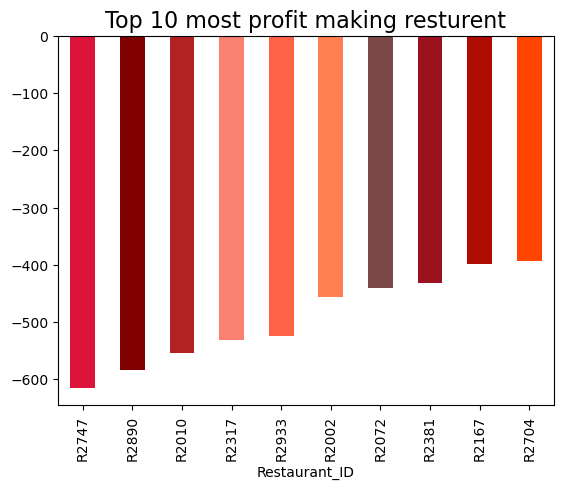

In [73]:
ax3 = orders_df.groupby('Restaurant_ID')['Profit'].sum().nsmallest(10).plot(kind='bar',color=('#dc143c','#800000','#b22222','#fa8072','#ff6347','#ff7f50','#7c4848','#9b111e','#ae0c00','#ff4500'))
plt.title('Top 10 most profit making resturent',fontsize = 16)

Text(0.5, 1.0, 'Profit v/s Discount Amount')

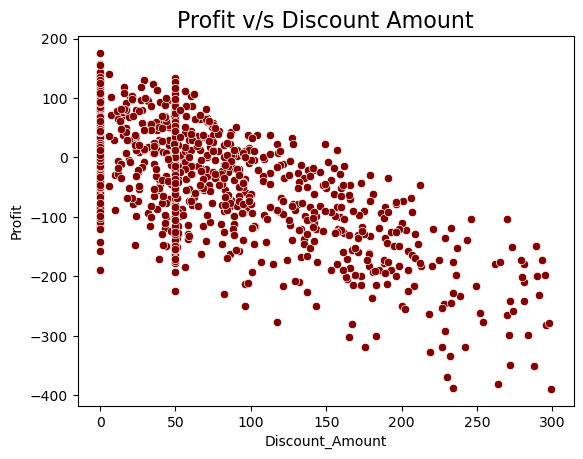

In [106]:
sns.scatterplot(x='Discount_Amount',y='Profit',data=orders_df,color='#800000')
plt.title('Profit v/s Discount Amount',fontsize = 16)

Text(0.5, 1.0, 'Commission % v/s Order Value')

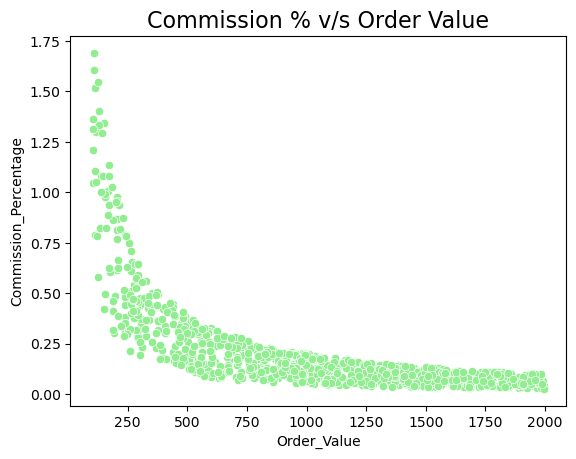

In [79]:
sns.scatterplot(x='Order_Value',y='Commission_Percentage',data=orders_df,color='#90EE90')
plt.title('Commission % v/s Order Value',fontsize = 16)

Text(0.5, 1.0, 'Contributing elements proportion in total cost')

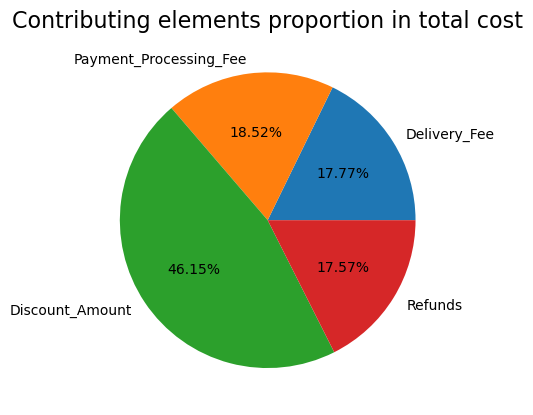

In [91]:
cost_elements = orders_df[['Delivery_Fee','Payment_Processing_Fee','Discount_Amount','Refunds']].sum()
plt.pie(x=cost_elements,labels=cost_elements.index,autopct='%0.2f%%')
plt.title('Contributing elements proportion in total cost',fontsize = 16)

Text(0.5, 1.0, 'Average Profit based on Type of Discount')

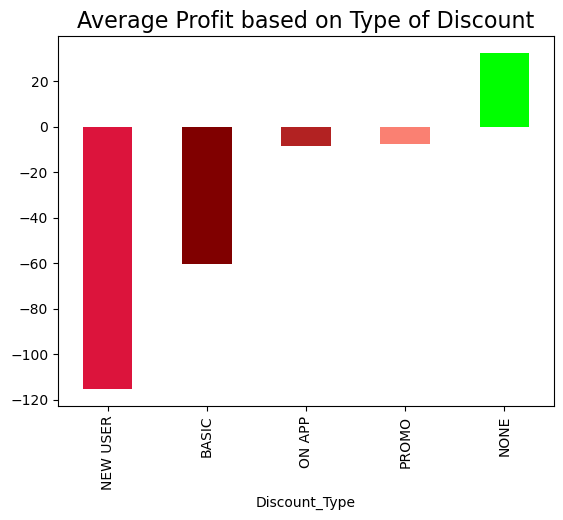

In [102]:
orders_df['Discount_Type']=orders_df['Discount_Type'].fillna('No offers')
avg_profit = orders_df.groupby('Discount_Type')['Profit'].mean().sort_values()
avg_profit.plot(kind='bar', color=('#dc143c','#800000','#b22222','#fa8072','#00FF00'))
plt.title('Average Profit based on Type of Discount',fontsize = 16)

C:\Users\sneha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


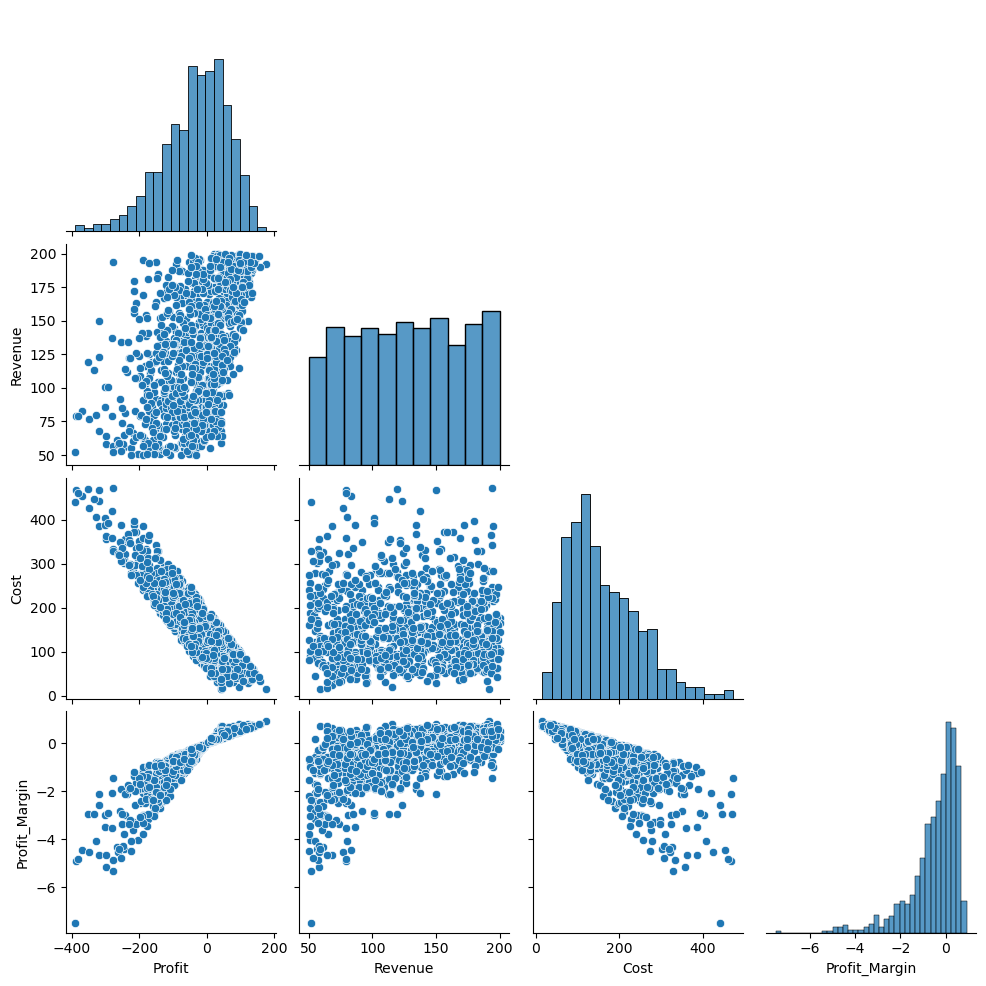

In [121]:
metricsdf=orders_df[['Profit','Revenue','Cost','Profit_Margin']]
metricsdf.head()
sns.pairplot(metricsdf,corner=True)